In [18]:
%%time
#Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Wall time: 0 ns


In [19]:
%%time
df = pd.read_excel("df_OHE.xlsx") # reading the file and printing the first 5 rows 
df.head()

Wall time: 9.59 s


,fss__class__score,wex_tenure,money_code_to_ttl_spend,commercial__credit__score,ai_rg,fuel_amt_by_ttl_spend_12m_overall,years__in__business,cash_amt_by_ttl_spend_12m_overall,financial__stress__score,misc_amt_by_ttl_spend_12m_overall,paydex,has_security_deposit,bankruptcy__found,risk_grade__c,Event_Rate
0,3,29,0.082600,567,4,0.915819,2,0.001067,1495,0.000514,80,0,0,8,0
1,3,269,0.016501,547,2,0.981481,39,0.001885,1487,0.000133,80,1,0,8,0
2,4,54,0.000000,492,2,0.987366,5,0.000000,1408,0.012634,75,0,0,8,0
3,2,93,0.000000,577,2,1.000000,39,0.000000,1521,0.000000,80,0,0,8,0
4,4,101,0.000000,316,2,1.000000,13,0.000000,1431,0.000000,67,0,0,8,0


In [20]:
%%time
df.info() # getting basic information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82852 entries, 0 to 82851
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   fss__class__score                  82852 non-null  int64  
 1   wex_tenure                         82852 non-null  int64  
 2   money_code_to_ttl_spend            82852 non-null  float64
 3   commercial__credit__score          82852 non-null  int64  
 4   ai_rg                              82852 non-null  int64  
 5   fuel_amt_by_ttl_spend_12m_overall  82852 non-null  float64
 6   years__in__business                82852 non-null  int64  
 7   cash_amt_by_ttl_spend_12m_overall  82852 non-null  float64
 8   financial__stress__score           82852 non-null  int64  
 9   misc_amt_by_ttl_spend_12m_overall  82852 non-null  float64
 10  paydex                             82852 non-null  int64  
 11  has_security_deposit               82852 non-null  int

In [21]:
%%time
df.describe() # describing the data

Wall time: 53 ms


,fss__class__score,wex_tenure,money_code_to_ttl_spend,commercial__credit__score,ai_rg,fuel_amt_by_ttl_spend_12m_overall,years__in__business,cash_amt_by_ttl_spend_12m_overall,financial__stress__score,misc_amt_by_ttl_spend_12m_overall,paydex,has_security_deposit,bankruptcy__found,risk_grade__c,Event_Rate
count,82852.000000,82852.000000,82852.000000,82852.000000,82852.000000,82852.000000,82852.000000,82852.000000,82852.000000,82852.000000,82852.000000,82852.000000,82852.000000,82852.000000,82852.000000
mean,4.375404,39.407075,0.049412,486.059105,3.263603,0.905506,501.509776,0.016711,1431.561568,0.028371,60.565020,0.030911,0.001424,5.553891,0.024634
std,1.872481,47.333320,0.185122,94.833703,1.262625,0.218718,858.044091,0.087732,210.640311,0.091024,15.839444,0.173076,0.037712,5.519404,0.155009
min,1.000000,-47.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.201353,0.000000,-0.129234,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,0.000000,450.000000,2.000000,0.943461,3.000000,0.000000,1449.000000,0.000000,50.000000,0.000000,0.000000,3.000000,0.000000
50%,4.000000,21.000000,0.000000,476.000000,3.000000,0.973068,9.000000,0.000000,1450.000000,0.013311,50.000000,0.000000,0.000000,8.000000,0.000000
75%,7.000000,52.000000,0.000000,557.000000,4.000000,0.998094,97.000000,0.000000,1491.000000,0.029844,80.000000,0.000000,0.000000,8.000000,0.000000
max,7.000000,364.000000,1.201353,670.000000,8.000000,1.129234,2000.000000,1.000000,1706.000000,1.002268,89.000000,1.000000,1.000000,995.000000,1.000000


#### Attempting Multiple Models

In [23]:
%%time
X = df.iloc[:,:-1]  #independent variables
y = df.iloc[:,-1]   # dependent variable

Wall time: 4 ms


In [24]:
%%time
#creating objects of all required models and storing them in the list

models=[]
models.append(('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()))
models.append(("LogisticRegression",LogisticRegression(solver='sag',max_iter=2000)))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
models.append(("ExtraTree-Classifier",ExtraTreesClassifier()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(('Gaussian Naive-Bayes',GaussianNB()))
models.append(("SVC",SVC()))
models.append(('AdaBoost',AdaBoostClassifier()))
models.append(('GradientBoosting',GradientBoostingClassifier()))
models.append(('LightGBM',lgb.LGBMClassifier()))
models.append(('XgBoost',xgb.XGBClassifier()))



models

Wall time: 0 ns


[('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()),
 ('LogisticRegression', LogisticRegression(max_iter=2000, solver='sag')),
 ('DecisionTree', DecisionTreeClassifier()),
 ('RandomForest', RandomForestClassifier()),
 ('ExtraTree-Classifier', ExtraTreesClassifier()),
 ('KNeighbors', KNeighborsClassifier()),
 ('Gaussian Naive-Bayes', GaussianNB()),
 ('SVC', SVC()),
 ('AdaBoost', AdaBoostClassifier()),
 ('GradientBoosting', GradientBoostingClassifier()),
 ('LightGBM', LGBMClassifier()),
 ('XgBoost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_on

### Using K-Fold Cross Validation

In [25]:
%%time

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

Wall time: 0 ns


In [26]:
%%time
results = []
names = []
scoringA=['accuracy','precision_macro','recall_macro','roc_auc','f1_macro'] 
m_name=[]
m_method=[]   #macro weighs each class equally whereas micro weighs each sample equally.
m_mean=[]
m_std=[]
for name,model in models:
    for scoring_method in scoringA:
        cv_results = cross_val_score(model, X.sample(5000), y.sample(5000),cv=kfold,scoring=scoring_method,n_jobs=-1)  # computing cross validation score for every model
        m_name.append(name)
        m_method.append(scoring_method)
        m_mean.append(cv_results.mean())
        m_std.append(cv_results.std())

final_df=pd.DataFrame.from_dict({'Model-name':m_name,'Method':m_method,'mean_value':m_mean,'standard deviation':m_std})
final_df


Wall time: 47.5 s


,Model-name,Method,mean_value,standard deviation
0,LinearDiscriminantAnalysis,accuracy,0.974000,0.005441
1,LinearDiscriminantAnalysis,precision_macro,0.487700,0.003068
2,LinearDiscriminantAnalysis,recall_macro,0.500000,0.000000
3,LinearDiscriminantAnalysis,roc_auc,0.385615,0.077356
4,LinearDiscriminantAnalysis,f1_macro,0.492839,0.002291
5,LogisticRegression,accuracy,0.978200,0.004238
6,LogisticRegression,precision_macro,0.488900,0.003910
7,LogisticRegression,recall_macro,0.500000,0.000000
8,LogisticRegression,roc_auc,0.532978,0.058895
9,LogisticRegression,f1_macro,0.493564,0.001508


In [27]:
# Create the pivot table
piv = pd.pivot_table(data=final_df, index=final_df['Model-name'], columns=['Method'])

# Reorder the levels of the index
result = piv.reorder_levels([1, 0], axis='columns')
result_final = result.sort_index(axis='columns', level='Method')

result_final

Method                       accuracy                      f1_macro  \
                           mean_value standard deviation mean_value   
Model-name                                                            
AdaBoost                       0.9782           0.006838   0.494635   
DecisionTree                   0.9470           0.008820   0.487172   
ExtraTree-Classifier           0.9724           0.008040   0.493151   
Gaussian Naive-Bayes           0.9352           0.009928   0.457392   
GradientBoosting               0.9744           0.006248   0.492122   
KNeighbors                     0.9766           0.005731   0.494589   
LightGBM                       0.9758           0.006600   0.494178   
LinearDiscriminantAnalysis     0.9740           0.005441   0.492839   
LogisticRegression             0.9782           0.004238   0.493564   
RandomForest                   0.9714           0.006815   0.493966   
SVC                            0.9762           0.006838   0.494486   
XgBoost                        0.9774           0.003904   0.493257   

Method                                        precision_macro  \
                           standard deviation      mean_value   
Model-name                                                      
AdaBoost                             0.002005        0.487900   
DecisionTree                         0.001905        0.500496   
ExtraTree-Classifier                 0.001883        0.486468   
Gaussian Naive-Bayes                 0.068266        0.501138   
GradientBoosting                     0.001681        0.487450   
KNeighbors                           0.001236        0.486894   
LightGBM                             0.001640        0.486892   
LinearDiscriminantAnalysis           0.002291        0.487700   
LogisticRegression                   0.001508        0.488900   
RandomForest                         0.002451        0.487289   
SVC                                  0.001323        0.486300   
XgBoost                              0.001263        0.488096   

Method                                        recall_macro                     \
                           standard deviation   mean_value standard deviation   
Model-name                                                                      
AdaBoost                             0.002809     0.500000           0.000000   
DecisionTree                         0.014366     0.507826           0.027272   
ExtraTree-Classifier                 0.002643     0.498258           0.001215   
Gaussian Naive-Bayes                 0.026338     0.483986           0.028228   
GradientBoosting                     0.002507     0.498163           0.001626   
KNeighbors                           0.003421     0.500000           0.000000   
LightGBM                             0.004183     0.499796           0.000408   
LinearDiscriminantAnalysis           0.003068     0.500000           0.000000   
LogisticRegression                   0.003910     0.500000           0.000000   
RandomForest                         0.001683     0.499797           0.000407   
SVC                                  0.005622     0.500000           0.000000   
XgBoost                              0.002979     0.499587           0.000686   

Method                        roc_auc                     
                           mean_value standard deviation  
Model-name                                                
AdaBoost                     0.468915           0.099272  
DecisionTree                 0.489995           0.019410  
ExtraTree-Classifier         0.507747           0.064004  
Gaussian Naive-Bayes         0.489168           0.075086  
GradientBoosting             0.467567           0.066893  
KNeighbors                   0.498497           0.036504  
LightGBM                     0.576718           0.054253  
LinearDiscriminantAnalysis   0.385615           0.077356  
LogisticRegression           0.532978           0.058895  
RandomForest                 0.552

In [28]:
result_final.to_excel('output_all_scores_.xlsx',index=True) #storing all the scores in excel file

### Comparing Model Metrics 

#### Scoring Method Available : 'accuracy', 'precision_macro', 'recall_macro', 'roc_auc', 'f1_macro'

In [33]:
def compute_cv_scores(scoring_methods,imagename):
    results = []
    names = []
    #scoringA='accuracy'
    
    for name,model in models:
        cv_results = cross_val_score(model, X.sample(5000), y.sample(5000),  cv=kfold,scoring=scoring_methods,n_jobs=-1)  # computing cross validation score for every model
        results.append(cv_results)
        names.append(name)
        #print(name,':',results)

    names=['LDA','LogR','DT','RF','XtraTC','KNN','NB','SVC','Ada','GBM','LGBM','XgB']
    fig=plt.figure(figsize=(9,3))
    fig.suptitle('Algorithm ' +' '+imagename+ ' comparison')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.grid()
    plt.savefig(imagename  +' .jpeg')

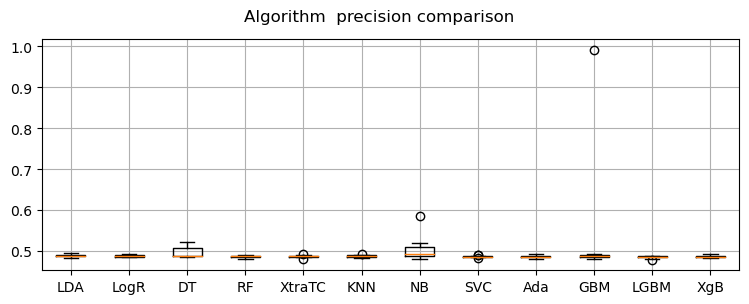

In [34]:
compute_cv_scores('precision_macro','precision') 

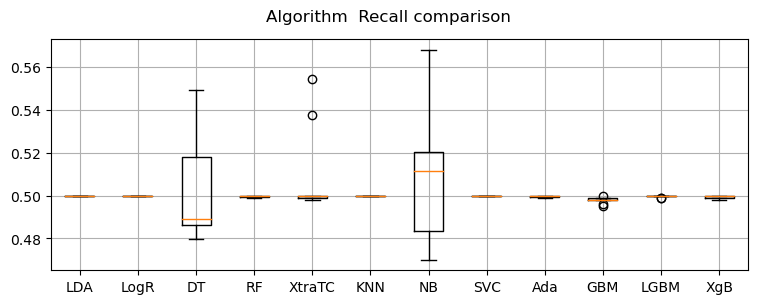

In [35]:
compute_cv_scores('recall_macro','Recall')    

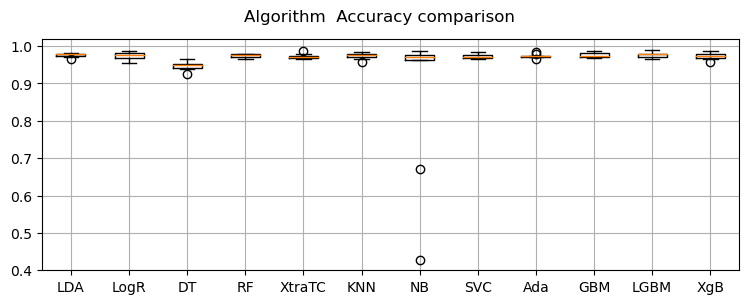

In [36]:
compute_cv_scores('accuracy','Accuracy')    

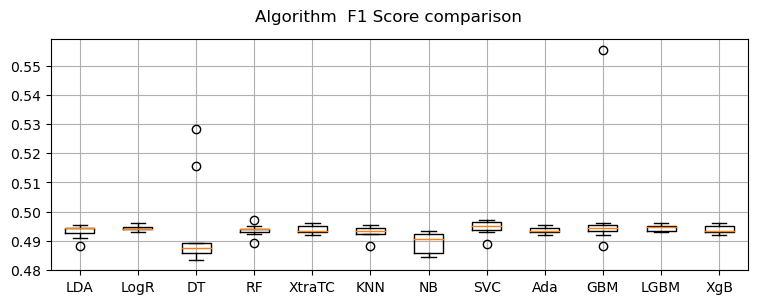

In [37]:
compute_cv_scores('f1_macro','F1 Score')    

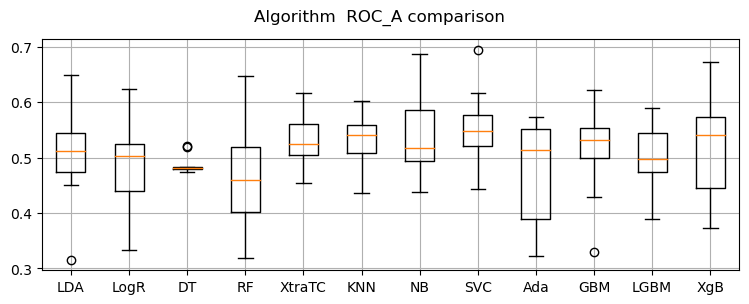

In [38]:
compute_cv_scores('roc_auc','ROC_A')  

In [ ]:
# %%time
# results = []
# names = []
# scoringA='accuracy'
# mm_name=[]
# mm_method=[]   #macro weighs each class equally whereas micro weighs each sample equally.
# mm_mean=[]
# mm_std=[]
# for name,model in models:
#     cv_results = cross_val_score(model, X.sample(10000), y.sample(10000),  cv=kfold,scoring=scoringA,n_jobs=-1)  # computing cross validation score for every model
#     results.append(cv_results)
#     names.append(name)
#     #print(name,':',results)

# names=['LDA','LogR','DT','RF','XtraTC','KNN','NB','SVC','Ada','GBM','LGBM','XgB']
# fig=plt.figure(figsize=(9,3))
# fig.suptitle('Algorithm Accuracy comparison')
# ax=fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.grid()
# plt.savefig('Accuracy.jpeg')

In [ ]:
# %%time
# # creating 2 lists one for name and other for model object. for ex:name = "LogisticRegression" and model= LogisticRegression()

# results = []
# names = []
# m_name=[]
# Method_value=[]
# avg_value=[]
# std=[]
# scoringA=['accuracy','precision_macro','recall_macro','roc_auc']
# for name,model in models:
#     for scoring_method in scoringA:
#         cv_results = cross_val_score(model, X, y,  cv=kfold,scoring=scoring_method,n_jobs=-1)  # computing cross validation score for every model
#         names.append(name)
#         results.append(cv_results)


# #creating final dataframe on the basis of three lists modelname , mean and standard deviation
# model_name=[]
# model_cvmean=[]
# model_cvstd=[] 
# for i in range(len(names)):
#     model_name.append(names[i])
#     model_cvmean.append(round(results[i].mean(),2))
#     model_cvstd.append(round(results[i].std(),4))
#     mo

# final_dataframe=pd.DataFrame.from_dict({'Name' : model_name, 'Accuracy(Mean)' : model_cvmean, 'Accuracy(std)' : model_cvstd})
# final_dataframe